# Clasificación de imágenes con KNN

In [140]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random
from PIL import Image # Python Image Library
from tensorflow.examples.tutorials.mnist import input_data

In [141]:
session = tf.Session()

In [142]:
mnist = input_data.read_data_sets("../../datasets/MNIST_data/", one_hot=True)
# one_hot=True ==> 5 = [0 0 0 0 0 1 0 0 0 0]
#                  2 = [0 0 1 0 0 0 0 0 0 0]

Extracting ../../datasets/MNIST_data/train-images-idx3-ubyte.gz
Extracting ../../datasets/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../../datasets/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../datasets/MNIST_data/t10k-labels-idx1-ubyte.gz


In [143]:
train_size = 10000
test_size = 120

In [144]:
rand_train_idx = np.random.choice(len(mnist.train.images), size=train_size, replace=False)
rand_test_idx = np.random.choice(len(mnist.test.images), size=test_size, replace=False)

In [145]:
x_vals_train = mnist.train.images[rand_train_idx]
x_vals_test = mnist.test.images[rand_test_idx]

y_vals_train = mnist.train.labels[rand_train_idx]
y_vals_test = mnist.test.labels[rand_test_idx]

In [146]:
k = 7
batch_size = 6

x_data_train = tf.placeholder(shape=[None, 784], dtype=tf.float32)
y_target_train = tf.placeholder(shape=[None, 10], dtype=tf.float32)

x_data_test = tf.placeholder(shape=[None, 784], dtype=tf.float32)
y_target_test = tf.placeholder(shape=[None, 10], dtype=tf.float32)

In [147]:
distance = tf.reduce_sum(tf.abs(tf.subtract(x_data_train, tf.expand_dims(x_data_test, axis=1))), axis=1) # Suma por columnas

In [148]:
top_k_vals, top_k_idx = tf.nn.top_k(tf.negative(distance), k = k)
prediction_idx = tf.gather(y_target_train, top_k_idx) # Análogo a prediction_idx = y_target_train[top_k_idx]
count_of_preds = tf.reduce_sum(prediction_idx, axis=0)
prediction = tf.argmax(count_of_preds) # Valor más alto de las predicciones

In [149]:
n_loops = int(len(x_vals_test)/batch_size)
n_loops

20

In [150]:
test_output = []
actual_vals = []

for i in range(n_loops):
    min_idx = i*batch_size
    max_idx = min((i+1)*batch_size, len(x_vals_test))
    
    x_batch = x_vals_test[min_idx:max_idx]
    y_batch = y_vals_test[min_idx:max_idx]
    
    predictions = session.run(prediction, feed_dict={x_data_train: x_vals_train, 
                                                     y_target_train: y_vals_train, 
                                                     x_data_test: x_batch,       
                                                     y_target_test: y_batch})
    test_output.extend(predictions)
    actual_vals.extend(np.argmax(y_batch, axis=1))

In [151]:
accuracy = sum([1.0/test_size for i in range(test_size) if test_output[i] == actual_vals[i]])
print("La precisión del algoritmo para k = {} ha sido de {}".format(k, accuracy))

La precisión del algoritmo para k = 7 ha sido de 0.13333333333333333


In [152]:
actuals = np.argmax(y_batch, axis=1)
actuals

array([5, 5, 8, 1, 5, 5])

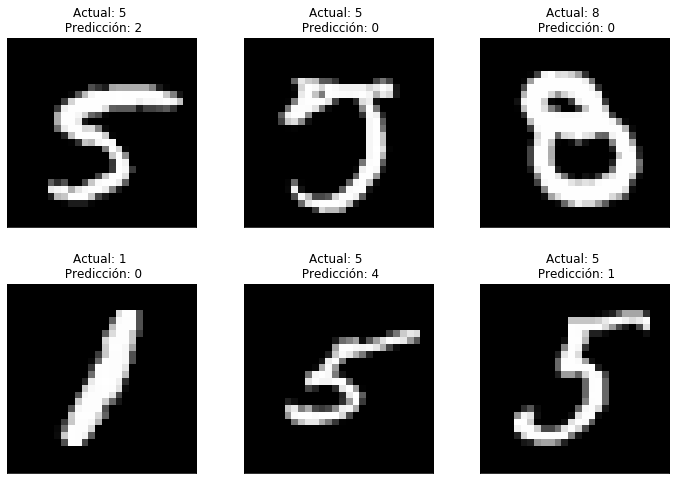

In [153]:
plt.figure(figsize=(12,8))

for i in range(len(actuals)):
    plt.subplot(2, 3, i+1)
    plt.imshow(np.reshape(x_batch[i], [28,28]), cmap="Greys_r")
    plt.title("Actual: {} \n Predicción: {}".format(actuals[i], predictions[i]))
    plt.subplots_adjust(hspace=0.3)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)